In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, GridSearchCV
import matplotlib.pyplot as plt
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
import copy
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import preprocessing

In [2]:
train = pd.read_csv("SimpleDatasetWithNewTarget.csv")

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001 entries, 0 to 10000
Data columns (total 23 columns):
artist_familiarity           9997 non-null float64
artist_hotttnesss            10001 non-null float64
artist_id                    10001 non-null object
artist_latitude              3742 non-null float64
artist_location              5709 non-null object
artist_longitude             3742 non-null float64
artist_name                  10001 non-null object
duration                     10001 non-null float64
end_of_fade_in               10001 non-null float64
key                          10001 non-null int64
key_confidence               10001 non-null float64
loudness                     10001 non-null float64
mode                         10001 non-null int64
mode_confidence              10001 non-null float64
release                      10001 non-null object
song_hotttnesss              5649 non-null float64
start_of_fade_out            10001 non-null float64
tempo               

In [4]:
drop_list = ['artist_location', 'artist_latitude', 'artist_longitude','artist_name', 'release', 'title' ,'song_hotttnesss']
train = train.drop(drop_list, axis=1)

In [5]:
train.head()

,artist_familiarity,artist_hotttnesss,artist_id,duration,end_of_fade_in,key,key_confidence,loudness,mode,mode_confidence,start_of_fade_out,tempo,time_signature,time_signature_confidence,year,bbhot
0,0.780462,0.574275,ARMQHX71187B9890D3,280.21506,0.238,5,0.555,-3.306,1,0.500,275.528,173.205,5,0.120,2001,0
1,0.581794,0.401998,ARD7TVE1187B99BFB1,218.93179,0.247,1,0.736,-11.197,0,0.636,218.932,92.198,4,0.778,0,0
2,0.630630,0.417500,ARMJAGH1187FB546F3,148.03546,0.148,6,0.169,-9.843,0,0.430,137.915,121.274,4,0.384,1969,1
3,0.487357,0.343428,ARKRRTF1187B9984DA,177.47546,0.282,8,0.643,-9.689,1,0.565,172.304,100.070,1,0.000,0,0
4,0.630382,0.454231,AR7G5I41187FB4CE6C,233.40363,0.000,0,0.751,-9.013,1,0.749,217.124,119.293,4,0.000,1982,0


In [6]:
#Encode artist id into quantitative
le = preprocessing.LabelEncoder()
train['artist_id'] = le.fit_transform(train['artist_id'].astype('str'))

In [7]:
train["artist_familiarity"] = train["artist_familiarity"].fillna(train["artist_familiarity"].median())

In [8]:
Y = copy.deepcopy(train.bbhot)
Y.shape
train = train.drop("bbhot", axis=1)

In [9]:
mode_final = []
for i, row in train.iterrows():
    print(i)
    print(train['mode_confidence'][i])
    if train['mode'][i] == 1:
        mode_final.append(train['mode_confidence'][i])
    else:
        mode_final.append(-train['mode_confidence'][i])
    print(mode_final[i])
train = train.drop('mode_confidence', axis=1)
train = train.drop('mode', axis=1)

0
0.5
0.5
1
0.636
-0.636
2
0.43
-0.43
3
0.565
0.565
4
0.749
0.749
5
0.371
0.371
6
0.557
0.557
7
0.0
0.0
8
0.16
-0.16
9
0.652
0.652
10
0.473
-0.473
11
0.485
-0.485
12
0.686
0.686
13
0.305
0.305
14
0.198
-0.198
15
0.533
0.533
16
0.829
0.829
17
0.516
0.516
18
0.346
0.346
19
0.756
0.756
20
0.568
0.568
21
0.716
0.716
22
0.521
0.521
23
0.666
0.666
24
0.453
0.453
25
0.541
0.541
26
0.512
0.512
27
0.486
-0.486
28
0.539
0.539
29
0.736
0.736
30
0.495
0.495
31
0.538
0.538
32
0.363
-0.363
33
0.042
0.042
34
0.402
0.402
35
0.464
0.464
36
0.364
0.364
37
0.367
-0.367
38
0.516
-0.516
39
0.251
0.251
40
0.546
0.546
41
0.579
0.579
42
0.589
0.589
43
0.392
-0.392
44
0.671
0.671
45
0.596
0.596
46
0.0
0.0
47
0.597
0.597
48
0.753
0.753
49
0.474
0.474
50
0.305
-0.305
51
0.486
0.486
52
0.319
0.319
53
0.614
0.614
54
0.597
-0.597
55
0.433
0.433
56
0.403
0.403
57
0.489
-0.489
58
0.371
0.371
59
0.658
0.658
60
0.602
0.602
61
0.613
0.613
62
0.369
-0.369
63
0.256
0.256
64
0.735
0.735
65
0.389
0.389
66
0.283
-0.283
67
0.

-0.52
730
0.636
0.636
731
0.562
0.562
732
0.548
0.548
733
0.501
-0.501
734
0.623
0.623
735
0.331
-0.331
736
0.441
-0.441
737
0.371
0.371
738
0.572
0.572
739
0.357
0.357
740
0.611
0.611
741
0.399
0.399
742
0.095
0.095
743
0.748
0.748
744
0.446
0.446
745
0.708
0.708
746
0.513
0.513
747
0.211
0.211
748
0.356
0.356
749
0.497
-0.497
750
0.514
0.514
751
0.502
0.502
752
0.323
-0.323
753
0.237
-0.237
754
0.542
0.542
755
0.382
-0.382
756
0.449
-0.449
757
0.797
-0.797
758
0.46
-0.46
759
0.541
0.541
760
0.372
-0.372
761
0.268
0.268
762
0.343
0.343
763
0.516
-0.516
764
0.534
0.534
765
0.897
0.897
766
0.24
0.24
767
0.426
0.426
768
0.012
0.012
769
0.6
0.6
770
0.479
-0.479
771
0.268
-0.268
772
0.609
0.609
773
0.55
-0.55
774
0.231
-0.231
775
0.721
-0.721
776
0.426
-0.426
777
0.286
-0.286
778
0.59
0.59
779
0.423
0.423
780
0.567
0.567
781
0.507
-0.507
782
0.532
0.532
783
0.71
0.71
784
0.723
0.723
785
0.509
0.509
786
0.267
0.267
787
0.616
0.616
788
0.609
0.609
789
0.294
0.294
790
0.726
0.726
791
0.403
0.

-0.647
1428
0.706
0.706
1429
0.443
-0.443
1430
0.443
-0.443
1431
0.063
-0.063
1432
0.503
0.503
1433
0.797
0.797
1434
0.625
-0.625
1435
0.731
0.731
1436
0.723
0.723
1437
0.484
0.484
1438
0.68
0.68
1439
0.381
0.381
1440
0.534
0.534
1441
0.512
0.512
1442
0.615
0.615
1443
0.38
0.38
1444
0.609
-0.609
1445
0.578
0.578
1446
0.627
0.627
1447
0.336
-0.336
1448
0.336
0.336
1449
0.308
0.308
1450
0.957
0.957
1451
0.0
0.0
1452
0.528
0.528
1453
0.371
-0.371
1454
0.569
-0.569
1455
0.578
0.578
1456
0.311
0.311
1457
0.436
-0.436
1458
0.392
-0.392
1459
0.659
0.659
1460
0.661
0.661
1461
0.383
-0.383
1462
0.231
-0.231
1463
0.581
0.581
1464
0.613
-0.613
1465
0.461
0.461
1466
0.357
0.357
1467
0.22
0.22
1468
0.626
0.626
1469
0.0
0.0
1470
0.807
0.807
1471
0.0
0.0
1472
0.354
0.354
1473
0.367
0.367
1474
0.59
0.59
1475
0.425
-0.425
1476
0.359
0.359
1477
0.673
0.673
1478
0.645
0.645
1479
0.394
0.394
1480
0.508
-0.508
1481
0.633
0.633
1482
0.695
0.695
1483
0.46
-0.46
1484
0.757
0.757
1485
0.581
0.581
1486
0.453
0.

2051
0.308
0.308
2052
0.47
0.47
2053
0.443
0.443
2054
0.811
0.811
2055
0.602
0.602
2056
0.461
0.461
2057
0.314
0.314
2058
0.551
0.551
2059
0.333
-0.333
2060
0.596
0.596
2061
0.718
0.718
2062
0.107
-0.107
2063
0.355
0.355
2064
0.338
0.338
2065
0.789
-0.789
2066
0.479
0.479
2067
0.603
-0.603
2068
0.642
0.642
2069
0.366
-0.366
2070
0.565
-0.565
2071
0.41
0.41
2072
0.182
0.182
2073
0.405
0.405
2074
0.46
0.46
2075
0.346
-0.346
2076
0.778
0.778
2077
0.2
-0.2
2078
0.497
0.497
2079
0.555
-0.555
2080
0.623
-0.623
2081
0.325
0.325
2082
0.34
-0.34
2083
0.301
-0.301
2084
0.47
0.47
2085
0.532
0.532
2086
0.526
0.526
2087
0.753
0.753
2088
0.311
0.311
2089
0.289
0.289
2090
0.468
0.468
2091
0.598
0.598
2092
0.505
0.505
2093
0.254
0.254
2094
0.531
-0.531
2095
0.71
0.71
2096
0.0
0.0
2097
0.548
0.548
2098
0.299
0.299
2099
0.0
-0.0
2100
0.153
0.153
2101
0.265
0.265
2102
0.327
0.327
2103
0.615
-0.615
2104
0.427
0.427
2105
0.696
0.696
2106
0.756
0.756
2107
0.537
0.537
2108
0.409
0.409
2109
0.454
-0.454
2110


0.555
0.555
2781
0.0
-0.0
2782
0.144
0.144
2783
0.268
0.268
2784
0.275
0.275
2785
0.469
0.469
2786
0.341
0.341
2787
0.335
0.335
2788
0.293
0.293
2789
0.308
-0.308
2790
0.714
0.714
2791
0.25
-0.25
2792
0.262
0.262
2793
0.744
0.744
2794
0.338
0.338
2795
0.541
-0.541
2796
0.536
0.536
2797
0.669
-0.669
2798
0.531
0.531
2799
0.371
-0.371
2800
0.739
0.739
2801
0.194
-0.194
2802
0.264
-0.264
2803
0.311
0.311
2804
0.583
0.583
2805
0.483
0.483
2806
0.632
0.632
2807
0.241
0.241
2808
0.567
-0.567
2809
0.489
0.489
2810
0.466
0.466
2811
0.426
0.426
2812
0.56
0.56
2813
0.657
-0.657
2814
0.472
0.472
2815
0.707
0.707
2816
0.479
0.479
2817
0.301
0.301
2818
0.399
0.399
2819
0.408
0.408
2820
0.493
0.493
2821
0.585
-0.585
2822
0.599
0.599
2823
0.259
-0.259
2824
0.084
-0.084
2825
0.901
0.901
2826
0.267
0.267
2827
0.345
0.345
2828
0.611
0.611
2829
0.654
-0.654
2830
0.737
0.737
2831
0.444
-0.444
2832
0.586
0.586
2833
0.364
0.364
2834
0.519
0.519
2835
0.0
0.0
2836
0.076
-0.076
2837
0.485
-0.485
2838
0.631
0.6

3439
0.485
0.485
3440
0.445
0.445
3441
0.177
-0.177
3442
0.641
0.641
3443
0.616
0.616
3444
0.53
-0.53
3445
0.343
0.343
3446
0.633
0.633
3447
0.393
-0.393
3448
0.711
0.711
3449
0.149
-0.149
3450
0.553
0.553
3451
0.65
0.65
3452
0.553
0.553
3453
0.767
0.767
3454
0.632
-0.632
3455
0.443
-0.443
3456
0.567
-0.567
3457
0.38
-0.38
3458
0.65
-0.65
3459
0.766
0.766
3460
0.194
0.194
3461
0.517
-0.517
3462
0.389
-0.389
3463
0.393
-0.393
3464
0.376
0.376
3465
0.514
0.514
3466
0.401
-0.401
3467
0.295
0.295
3468
0.107
0.107
3469
0.399
-0.399
3470
0.771
0.771
3471
0.135
0.135
3472
0.142
-0.142
3473
0.716
0.716
3474
0.848
0.848
3475
0.385
-0.385
3476
0.29
-0.29
3477
0.701
0.701
3478
0.567
0.567
3479
0.78
0.78
3480
0.367
0.367
3481
0.657
0.657
3482
0.603
0.603
3483
0.532
0.532
3484
0.489
0.489
3485
0.476
0.476
3486
0.624
-0.624
3487
0.589
0.589
3488
0.292
-0.292
3489
0.603
0.603
3490
0.529
0.529
3491
0.648
0.648
3492
0.666
-0.666
3493
0.6
0.6
3494
0.457
0.457
3495
0.436
0.436
3496
0.561
0.561
3497
0.262

4110
0.416
-0.416
4111
0.631
0.631
4112
0.097
0.097
4113
0.51
0.51
4114
0.417
-0.417
4115
0.282
-0.282
4116
0.591
-0.591
4117
0.675
0.675
4118
0.387
0.387
4119
0.624
0.624
4120
0.524
-0.524
4121
0.472
0.472
4122
0.0
0.0
4123
0.439
-0.439
4124
0.585
-0.585
4125
0.0
0.0
4126
0.53
0.53
4127
0.268
0.268
4128
0.365
0.365
4129
0.384
-0.384
4130
0.777
0.777
4131
0.95
0.95
4132
0.307
-0.307
4133
0.476
0.476
4134
0.782
0.782
4135
0.19
-0.19
4136
0.317
0.317
4137
0.277
0.277
4138
0.579
0.579
4139
0.574
-0.574
4140
0.48
0.48
4141
0.569
-0.569
4142
0.333
0.333
4143
0.505
0.505
4144
0.218
-0.218
4145
0.781
0.781
4146
0.593
-0.593
4147
0.466
-0.466
4148
0.236
0.236
4149
0.621
-0.621
4150
0.007
-0.007
4151
0.293
0.293
4152
0.707
0.707
4153
0.925
0.925
4154
0.472
0.472
4155
0.704
0.704
4156
0.594
0.594
4157
0.447
-0.447
4158
0.308
-0.308
4159
0.154
0.154
4160
0.509
0.509
4161
0.47
-0.47
4162
0.499
0.499
4163
0.297
-0.297
4164
0.576
0.576
4165
0.479
0.479
4166
0.677
0.677
4167
0.838
-0.838
4168
0.303
0

0.612
0.612
4774
0.6
0.6
4775
0.383
0.383
4776
0.0
0.0
4777
0.464
0.464
4778
0.633
-0.633
4779
0.519
-0.519
4780
0.397
-0.397
4781
0.481
0.481
4782
0.395
-0.395
4783
0.626
0.626
4784
0.828
0.828
4785
0.395
-0.395
4786
0.0
0.0
4787
0.236
0.236
4788
0.447
-0.447
4789
0.208
0.208
4790
0.518
-0.518
4791
0.689
0.689
4792
0.549
0.549
4793
0.261
-0.261
4794
0.535
0.535
4795
0.41
0.41
4796
0.431
-0.431
4797
0.444
-0.444
4798
0.676
0.676
4799
0.675
-0.675
4800
0.596
0.596
4801
0.451
0.451
4802
0.52
0.52
4803
0.901
-0.901
4804
0.483
0.483
4805
0.469
-0.469
4806
0.517
0.517
4807
0.573
0.573
4808
0.412
0.412
4809
0.426
0.426
4810
0.409
-0.409
4811
0.709
0.709
4812
0.316
0.316
4813
0.0
0.0
4814
0.503
-0.503
4815
0.275
0.275
4816
0.573
0.573
4817
0.085
-0.085
4818
0.323
-0.323
4819
0.362
-0.362
4820
0.6
0.6
4821
0.81
0.81
4822
0.515
0.515
4823
0.288
-0.288
4824
0.54
-0.54
4825
0.704
0.704
4826
0.278
0.278
4827
0.479
0.479
4828
0.457
0.457
4829
0.659
0.659
4830
0.305
0.305
4831
0.325
-0.325
4832
0.58

5440
0.142
-0.142
5441
0.56
0.56
5442
0.628
0.628
5443
0.184
0.184
5444
0.0
-0.0
5445
0.406
0.406
5446
0.839
0.839
5447
0.187
0.187
5448
0.282
0.282
5449
0.694
0.694
5450
0.543
0.543
5451
0.381
0.381
5452
0.476
0.476
5453
0.484
0.484
5454
0.56
0.56
5455
0.624
-0.624
5456
0.779
0.779
5457
0.484
-0.484
5458
0.569
0.569
5459
0.266
0.266
5460
0.735
0.735
5461
0.398
-0.398
5462
0.197
0.197
5463
0.331
0.331
5464
0.792
0.792
5465
0.488
-0.488
5466
0.453
0.453
5467
0.327
0.327
5468
0.698
0.698
5469
0.652
0.652
5470
0.563
0.563
5471
0.415
-0.415
5472
0.428
0.428
5473
0.408
0.408
5474
0.516
-0.516
5475
0.492
0.492
5476
0.405
0.405
5477
0.575
-0.575
5478
0.383
-0.383
5479
0.425
0.425
5480
0.596
0.596
5481
0.849
0.849
5482
0.55
0.55
5483
0.446
-0.446
5484
0.484
0.484
5485
0.266
-0.266
5486
0.784
-0.784
5487
0.704
0.704
5488
0.462
0.462
5489
0.813
0.813
5490
0.689
0.689
5491
0.417
0.417
5492
0.824
-0.824
5493
0.436
0.436
5494
0.36
-0.36
5495
0.215
0.215
5496
0.791
0.791
5497
0.286
0.286
5498
0.647


0.549
6105
0.411
-0.411
6106
0.467
0.467
6107
0.369
0.369
6108
0.515
0.515
6109
0.527
-0.527
6110
0.52
0.52
6111
0.625
0.625
6112
0.832
0.832
6113
0.664
0.664
6114
0.593
0.593
6115
0.308
0.308
6116
0.256
-0.256
6117
0.316
0.316
6118
0.576
-0.576
6119
0.515
0.515
6120
0.201
-0.201
6121
0.764
0.764
6122
0.469
0.469
6123
0.373
0.373
6124
0.478
-0.478
6125
0.604
0.604
6126
0.489
0.489
6127
0.282
0.282
6128
0.586
-0.586
6129
0.434
-0.434
6130
0.333
0.333
6131
0.578
0.578
6132
0.487
0.487
6133
0.471
0.471
6134
0.406
-0.406
6135
0.612
0.612
6136
0.627
0.627
6137
0.29
0.29
6138
0.672
-0.672
6139
0.479
0.479
6140
0.473
-0.473
6141
0.503
0.503
6142
0.747
-0.747
6143
0.567
0.567
6144
0.565
0.565
6145
0.652
0.652
6146
0.503
-0.503
6147
0.364
0.364
6148
0.655
0.655
6149
0.467
0.467
6150
0.217
-0.217
6151
0.57
-0.57
6152
0.0
0.0
6153
0.483
-0.483
6154
0.473
-0.473
6155
0.358
-0.358
6156
0.578
0.578
6157
0.041
-0.041
6158
0.322
0.322
6159
0.513
-0.513
6160
0.381
0.381
6161
0.412
0.412
6162
0.76
0.76


0.682
0.682
6775
0.0
0.0
6776
0.414
-0.414
6777
0.322
0.322
6778
0.852
0.852
6779
0.648
0.648
6780
0.559
-0.559
6781
0.0
0.0
6782
0.363
0.363
6783
0.321
-0.321
6784
0.589
0.589
6785
0.555
0.555
6786
0.368
-0.368
6787
0.202
-0.202
6788
0.237
-0.237
6789
0.611
0.611
6790
0.427
0.427
6791
0.618
-0.618
6792
0.482
-0.482
6793
0.522
0.522
6794
0.395
0.395
6795
0.569
0.569
6796
0.173
0.173
6797
0.0
-0.0
6798
0.353
-0.353
6799
0.605
0.605
6800
0.178
-0.178
6801
0.748
0.748
6802
0.645
0.645
6803
0.587
-0.587
6804
0.534
0.534
6805
0.72
-0.72
6806
0.664
0.664
6807
0.581
0.581
6808
0.383
0.383
6809
0.438
-0.438
6810
0.299
0.299
6811
0.17
-0.17
6812
0.299
0.299
6813
0.611
0.611
6814
0.395
-0.395
6815
0.354
0.354
6816
0.57
0.57
6817
0.324
-0.324
6818
0.387
0.387
6819
0.383
0.383
6820
0.578
0.578
6821
0.583
-0.583
6822
0.383
0.383
6823
0.445
0.445
6824
0.852
0.852
6825
0.51
-0.51
6826
0.449
-0.449
6827
0.262
0.262
6828
0.724
0.724
6829
0.0
0.0
6830
0.399
0.399
6831
0.808
0.808
6832
0.663
0.663
6833
0

0.448
0.448
7439
0.117
0.117
7440
0.589
0.589
7441
0.676
0.676
7442
0.487
0.487
7443
0.308
0.308
7444
0.428
-0.428
7445
0.461
-0.461
7446
0.581
0.581
7447
0.661
0.661
7448
0.524
0.524
7449
0.257
0.257
7450
0.019
0.019
7451
0.694
-0.694
7452
0.295
0.295
7453
0.203
0.203
7454
0.397
-0.397
7455
0.454
-0.454
7456
0.686
0.686
7457
0.489
0.489
7458
0.606
-0.606
7459
0.389
0.389
7460
0.374
-0.374
7461
0.431
-0.431
7462
0.44
0.44
7463
0.271
0.271
7464
0.379
-0.379
7465
0.322
-0.322
7466
0.821
0.821
7467
0.476
-0.476
7468
0.087
0.087
7469
0.568
0.568
7470
0.468
0.468
7471
0.335
-0.335
7472
0.785
0.785
7473
0.0
-0.0
7474
0.631
0.631
7475
0.706
0.706
7476
0.436
0.436
7477
0.437
0.437
7478
0.542
-0.542
7479
0.822
0.822
7480
0.479
0.479
7481
0.598
0.598
7482
0.377
0.377
7483
0.179
0.179
7484
0.375
-0.375
7485
0.536
-0.536
7486
0.674
-0.674
7487
0.682
0.682
7488
0.524
0.524
7489
0.621
0.621
7490
0.473
-0.473
7491
0.756
0.756
7492
0.742
0.742
7493
0.305
0.305
7494
0.696
0.696
7495
0.383
0.383
7496
0.

-0.442
8104
0.648
0.648
8105
0.532
0.532
8106
0.77
0.77
8107
0.583
0.583
8108
0.553
-0.553
8109
0.313
0.313
8110
0.5
0.5
8111
0.435
0.435
8112
0.529
0.529
8113
0.333
-0.333
8114
0.18
0.18
8115
0.432
-0.432
8116
0.336
-0.336
8117
0.587
0.587
8118
0.471
0.471
8119
0.708
0.708
8120
0.406
0.406
8121
0.655
0.655
8122
0.7
-0.7
8123
0.61
0.61
8124
0.442
-0.442
8125
0.296
0.296
8126
0.427
0.427
8127
0.576
0.576
8128
0.391
0.391
8129
0.473
0.473
8130
0.564
0.564
8131
0.509
0.509
8132
0.659
-0.659
8133
0.242
0.242
8134
0.881
0.881
8135
0.683
-0.683
8136
0.298
0.298
8137
0.429
0.429
8138
0.214
0.214
8139
0.365
0.365
8140
0.575
0.575
8141
0.347
-0.347
8142
0.602
0.602
8143
0.301
-0.301
8144
0.596
0.596
8145
0.6
-0.6
8146
0.328
-0.328
8147
0.578
-0.578
8148
0.919
0.919
8149
0.101
-0.101
8150
0.351
-0.351
8151
0.459
0.459
8152
0.476
0.476
8153
0.766
0.766
8154
0.503
-0.503
8155
0.34
0.34
8156
0.38
0.38
8157
0.523
0.523
8158
0.294
0.294
8159
0.325
-0.325
8160
0.484
0.484
8161
0.431
0.431
8162
0.302
-

8755
0.597
0.597
8756
0.465
0.465
8757
0.562
0.562
8758
0.739
0.739
8759
0.331
0.331
8760
0.793
-0.793
8761
0.339
0.339
8762
0.489
-0.489
8763
0.295
0.295
8764
0.38
0.38
8765
0.354
-0.354
8766
0.68
-0.68
8767
0.511
0.511
8768
0.468
-0.468
8769
0.757
-0.757
8770
0.627
0.627
8771
0.508
0.508
8772
0.645
0.645
8773
0.412
-0.412
8774
0.564
-0.564
8775
0.439
0.439
8776
0.154
-0.154
8777
0.703
0.703
8778
0.402
-0.402
8779
0.371
-0.371
8780
0.647
0.647
8781
0.693
0.693
8782
0.578
0.578
8783
0.335
-0.335
8784
0.413
0.413
8785
0.713
0.713
8786
0.272
0.272
8787
0.498
0.498
8788
0.185
0.185
8789
0.621
-0.621
8790
0.481
-0.481
8791
0.5
-0.5
8792
0.245
0.245
8793
0.608
0.608
8794
0.766
0.766
8795
0.515
0.515
8796
0.787
0.787
8797
0.588
-0.588
8798
0.808
0.808
8799
0.589
0.589
8800
0.659
0.659
8801
0.47
-0.47
8802
0.5
0.5
8803
0.461
-0.461
8804
0.091
0.091
8805
0.443
0.443
8806
0.687
0.687
8807
0.226
-0.226
8808
0.278
0.278
8809
0.0
-0.0
8810
0.289
0.289
8811
0.348
0.348
8812
0.428
-0.428
8813
0.43
0

0.531
0.531
9431
0.403
0.403
9432
0.583
0.583
9433
0.684
-0.684
9434
0.403
0.403
9435
0.368
-0.368
9436
0.514
0.514
9437
0.712
0.712
9438
0.54
0.54
9439
0.492
-0.492
9440
0.55
0.55
9441
0.654
0.654
9442
0.786
0.786
9443
0.378
0.378
9444
0.529
0.529
9445
0.357
0.357
9446
0.575
0.575
9447
0.395
0.395
9448
0.455
-0.455
9449
0.695
0.695
9450
0.379
0.379
9451
0.899
0.899
9452
0.655
0.655
9453
0.586
0.586
9454
0.352
-0.352
9455
0.21
0.21
9456
0.675
0.675
9457
0.867
0.867
9458
0.219
-0.219
9459
0.718
0.718
9460
0.471
0.471
9461
0.582
0.582
9462
0.643
-0.643
9463
0.632
0.632
9464
0.529
0.529
9465
0.591
0.591
9466
0.346
0.346
9467
0.495
0.495
9468
0.376
0.376
9469
0.581
-0.581
9470
0.446
0.446
9471
0.443
0.443
9472
0.584
0.584
9473
0.628
0.628
9474
0.684
0.684
9475
0.897
0.897
9476
0.659
0.659
9477
0.176
0.176
9478
0.932
0.932
9479
0.509
0.509
9480
0.623
-0.623
9481
0.294
0.294
9482
0.41
-0.41
9483
0.644
-0.644
9484
0.415
-0.415
9485
0.689
-0.689
9486
0.637
0.637
9487
0.361
0.361
9488
0.0
0.0
9

In [13]:
print(train.shape, Y.shape)
train['mode'] = mode_final

(10001, 14) (10001,)


In [15]:
#Function to evaluate my model with Cross validation
from sklearn.model_selection import cross_val_score
def testingModel(model, X_train, Y_train):
    scores = cross_val_score(model, X_train, Y_train, cv=10, scoring = "roc_auc")
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard Deviation:", scores.std())

In [16]:
X_train, X_test, y_train, y_test = train_test_split(train, Y, test_size=0.33, random_state=7)
model = XGBClassifier(
 learning_rate =0.1,
 n_estimators=100,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
model.fit(X_train, y_train)
testingModel(model, train, Y)
# make predictions for test data
y_pred = model.predict(X_test)
accuracy = model.score(X_test, y_test)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Scores: [ 0.60992244  0.64634885  0.6596114   0.68615687  0.59758296  0.66152863
  0.61867244  0.60191341  0.6292601   0.6230042 ]
Mean: 0.6334001302
Standard Deviation: 0.0275622774369
Accuracy: 87.97%


tempo                        219
artist_familiarity           215
mode                         191
loudness                     189
artist_hotttnesss            178
key_confidence               177
artist_id                    164
end_of_fade_in               135
start_of_fade_out            134
duration                     128
time_signature_confidence    110
year                         105
key                           89
time_signature                23
dtype: int64


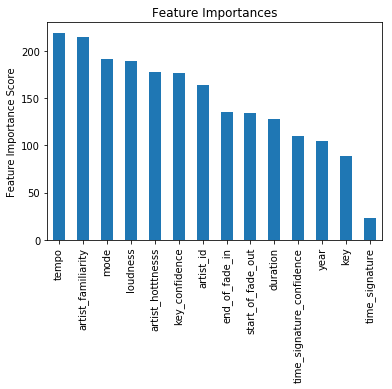

In [17]:
feat_imp = pd.Series(model.get_booster().get_fscore()).sort_values(ascending=False)
print(feat_imp)
feat_imp.plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')
plt.show()

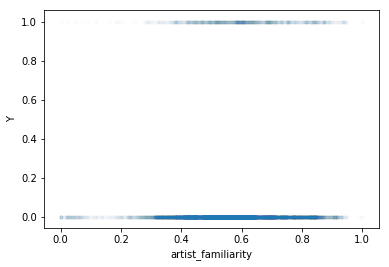

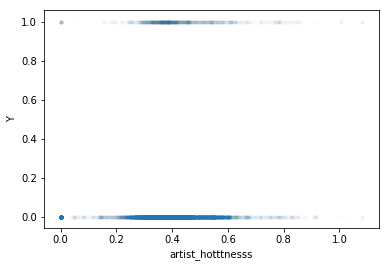

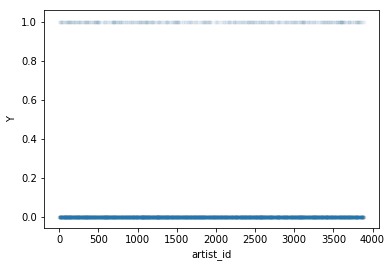

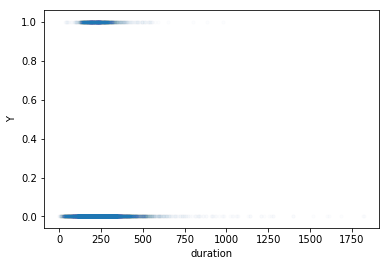

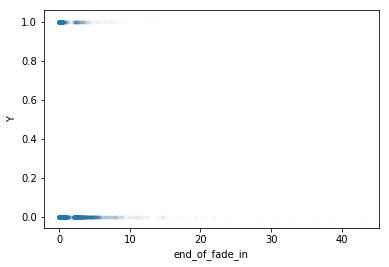

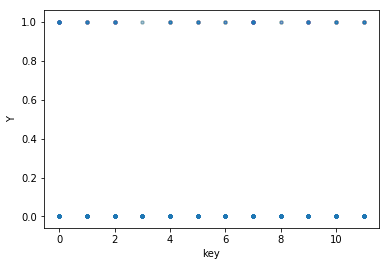

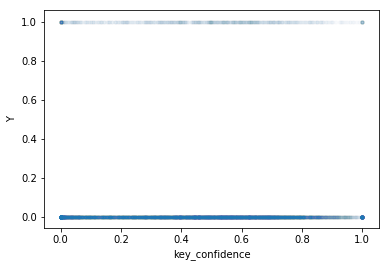

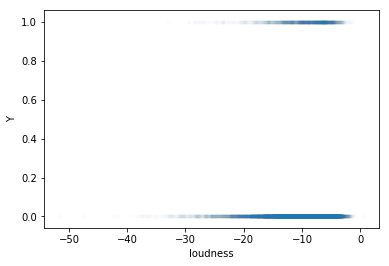

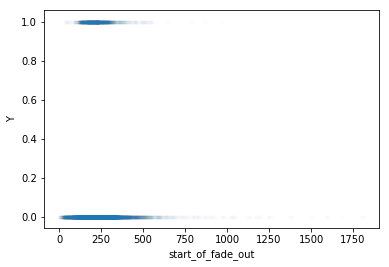

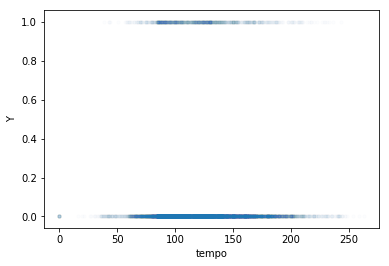

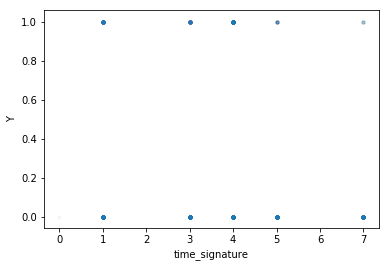

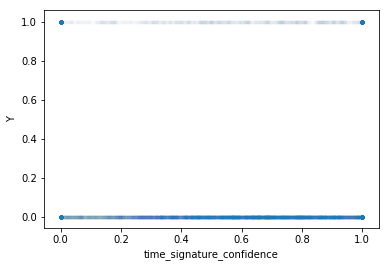

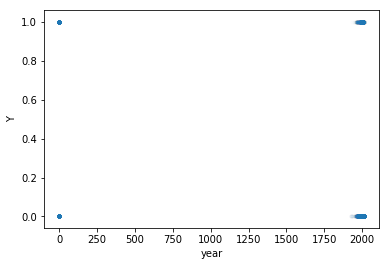

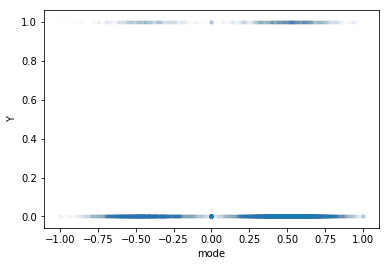

In [21]:
def scatter(x, y, xlabel, ylabel):
    plt.scatter(x, y, s=10, alpha=.01)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

for f in train.columns:
    scatter(train[f], Y, f, 'Y')

In [75]:
def optimal(feature):
    vals = []
    for i, row in train.iterrows():
        if Y[i] >= 0.9:
            vals.append(train[feature][i])
    print(feature, ':', 'mean', np.round(np.mean(vals),2), 'std',np.round(np.std(vals),2))

In [76]:
optimal('tempo')
optimal('artist_familiarity')
optimal('mode')
optimal('loudness')
optimal('artist_hotttnesss')

tempo : mean 121.96 std 33.24
artist_familiarity : mean 0.61 std 0.16
mode : mean 0.25 std 0.46
loudness : mean -9.8 std 4.75
artist_hotttnesss : mean 0.43 std 0.16
